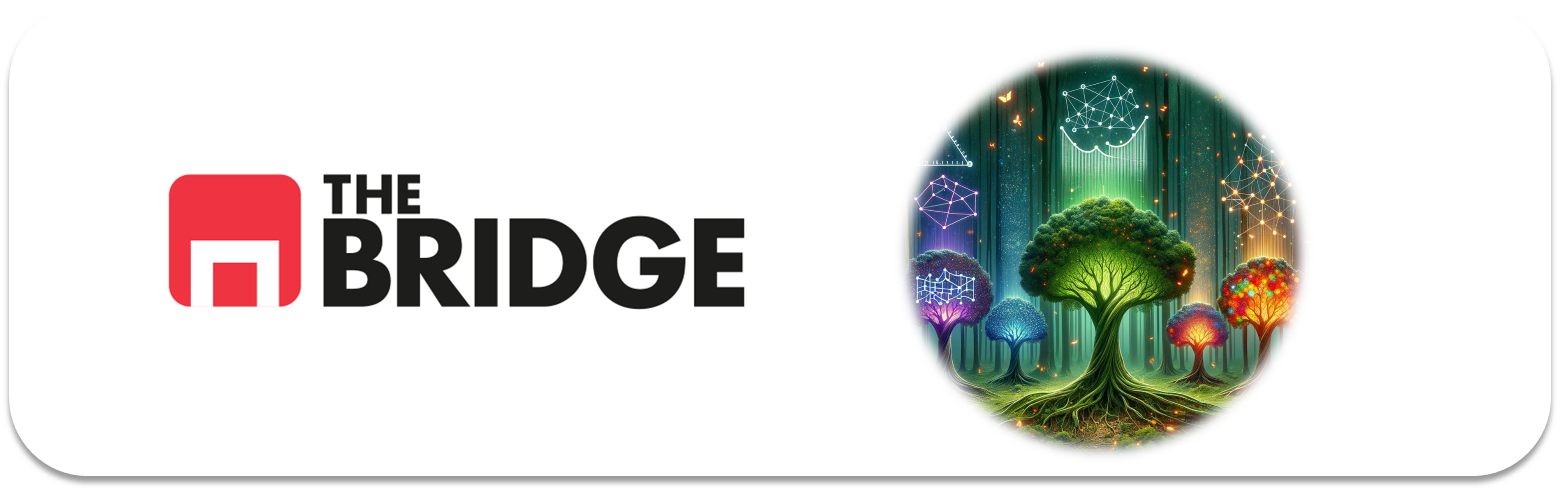

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

In [190]:
#para la siguiente vez, tener en cuenta que biologicamente no puedes dar 0 en estos test, entonces esos 0 son nulos, 
#habrían que reemplazarlos con la mediana

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [94]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [95]:
df = pd.read_csv(url, names=names)

In [96]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menos tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [97]:
# en este caso vamos a tener que resovler un problema de clasificación, que consiste en clasificar si tendrás o no tendrás diabetes

In [98]:
# marcamos la columna target

In [99]:
target = ['class']

In [100]:
# voy a mirar los datos

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


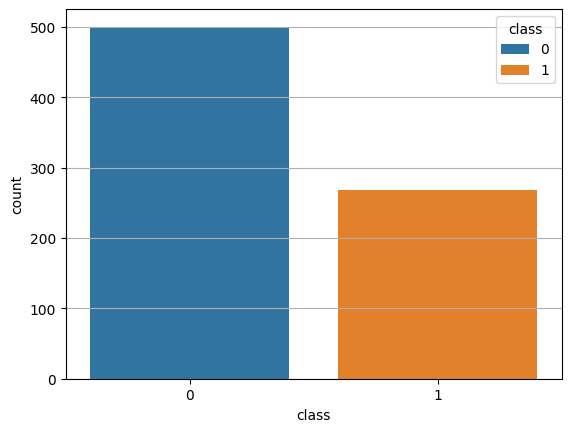

In [103]:
sns.countplot(df, x='class', hue='class')
plt.grid(axis='y');

In [104]:
df['class'].value_counts(True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [105]:
numericas = [x for x in df.columns if x != 'class']
numericas

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

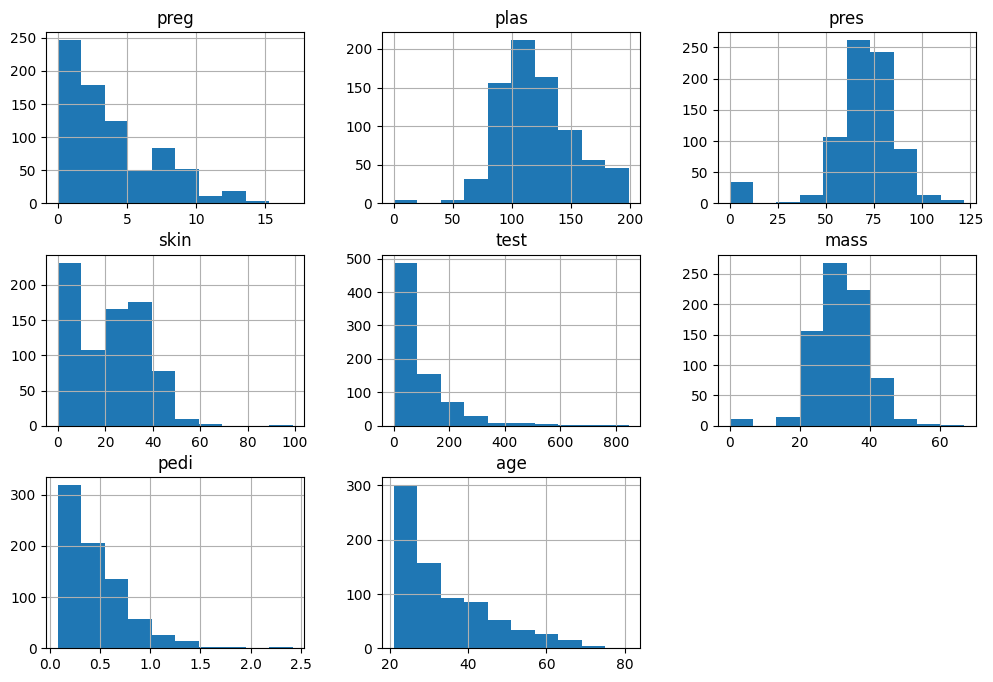

In [106]:
df[numericas].hist(figsize=(12,8));    

In [107]:
# chequeo de la edad

<Axes: xlabel='preg', ylabel='count'>

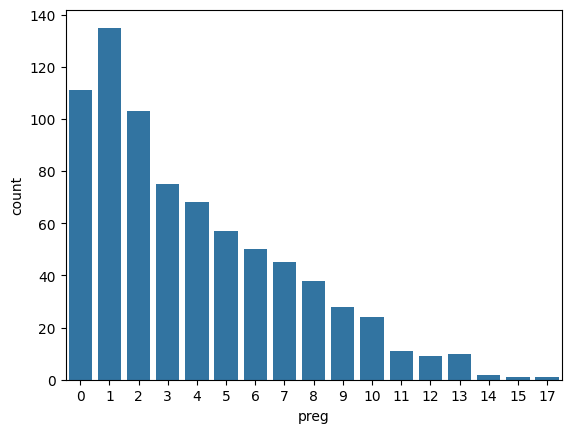

In [108]:
sns.countplot(df, x='preg')

In [48]:
# embarazos, según la edad

<Axes: xlabel='age', ylabel='preg'>

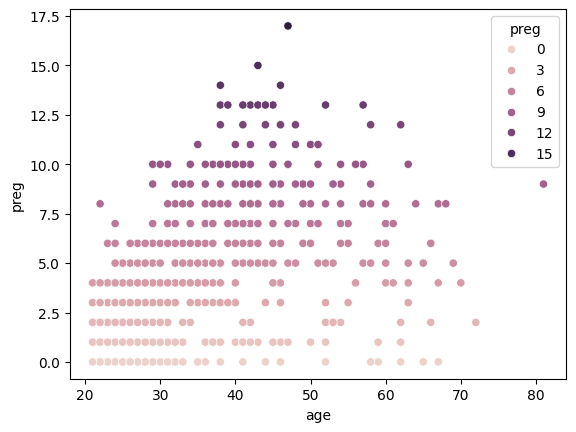

In [109]:
sns.scatterplot(data= df, y='preg', x='age', hue='preg')

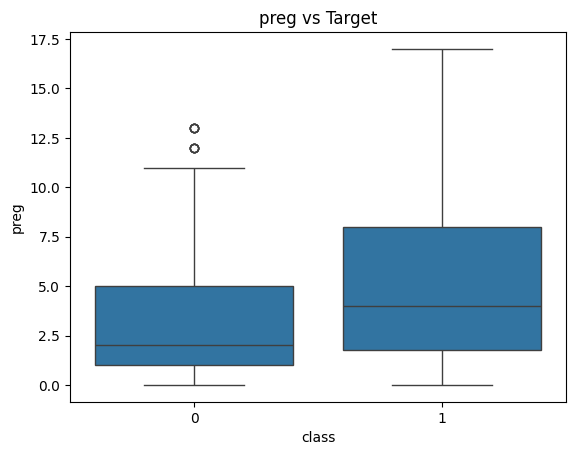

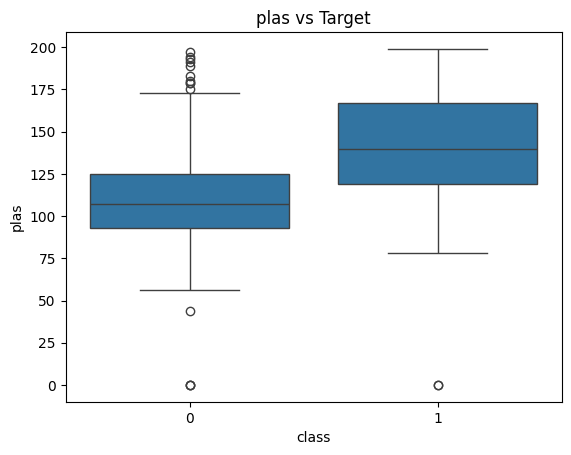

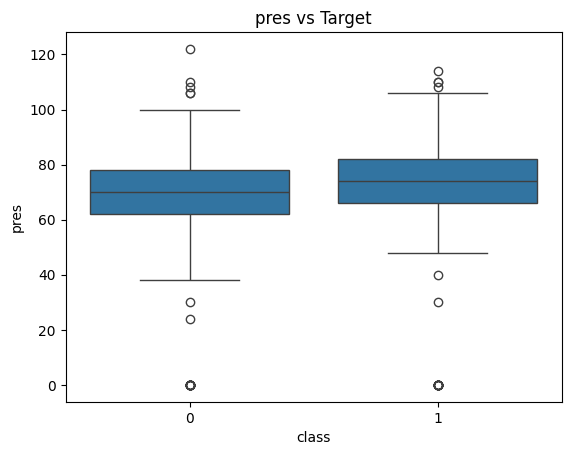

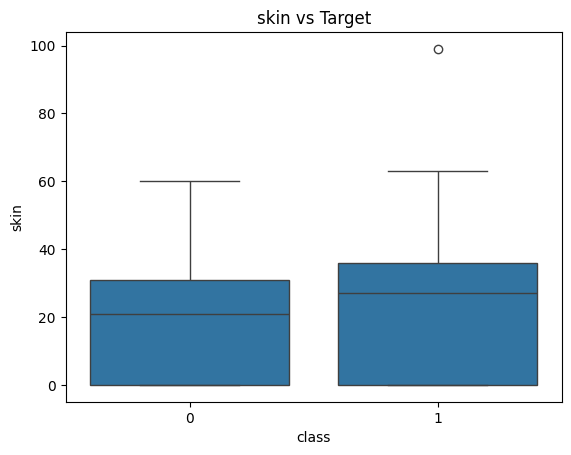

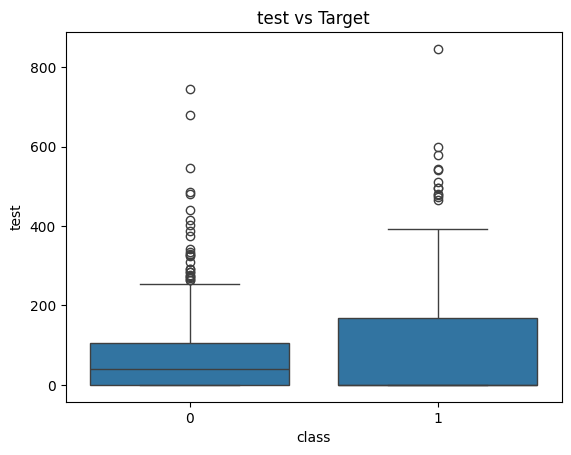

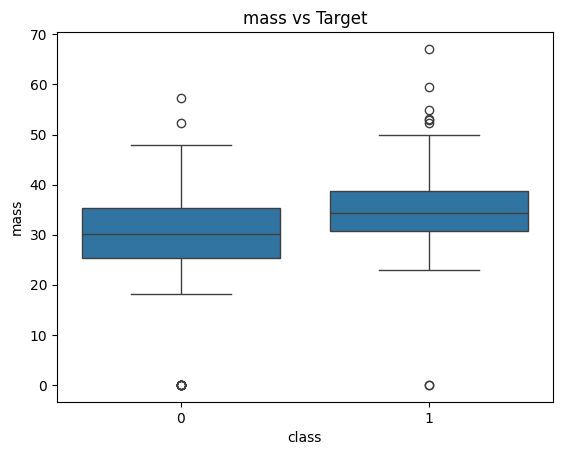

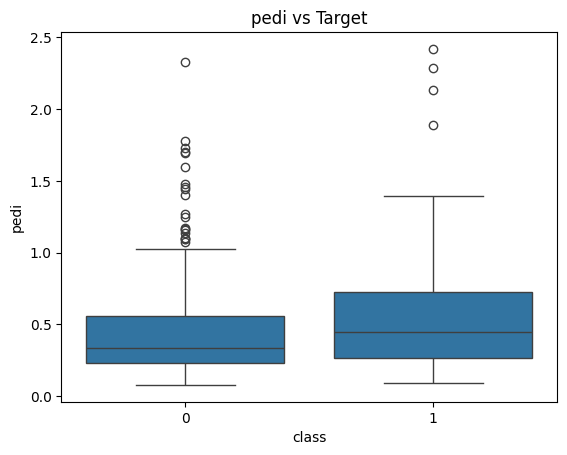

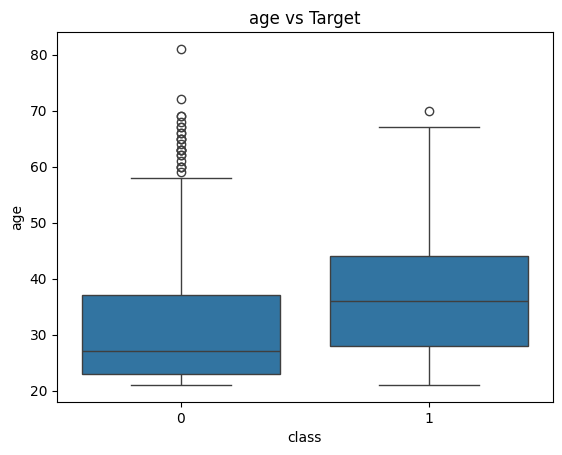

In [110]:
for feature in numericas:
    sns.boxplot(data=df, x='class', y=feature)
    plt.title(f'{feature} vs Target')
    plt.show()

In [50]:
# como vemos, casi todas las varaibles las cajas no son similares, significa que aportan valor al modelo
# tendriamos que ver la variable 'pres', los resultados son muy parecidos, quizas esta variable no aporta valor al modelo

In [55]:
correlacion  = df.corr()['class'].sort_values(ascending=False)
correlacion

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

In [60]:
# aún que tenga una correlacion muy baja 'pres', puede ser determiante para el modelo, y también es importante para la diabetes la presión arterial

In [61]:
# si que vamos a quitar la columna 'skin', por su baja correlación y por que no tiene una gran importancia en la diabetes

In [111]:
df = df.drop(columns='skin')

In [57]:
# Vamos a dividir entest y train

In [131]:
# usamos el stratify por el desbalance que hay en el target

In [133]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='class')
y= df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [66]:
# no es necesario hacer un centrado de datos pero lo vamos a hacer para que tengan una forma mas centrada

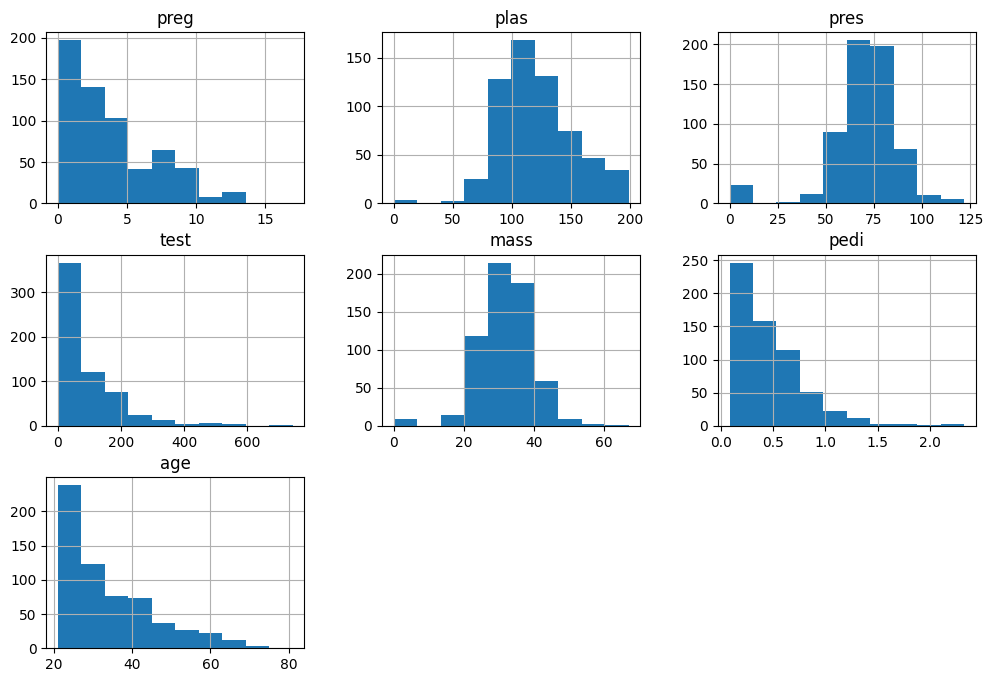

In [135]:
X_train.hist(figsize=(12,8)); 

In [115]:
for x in X_train:
    print(X_train[x].value_counts())
    print('\n')

preg
1     116
0      91
2      75
3      64
4      52
5      45
6      44
7      35
8      28
9      22
10     19
11      8
13      6
12      5
14      2
15      1
17      1
Name: count, dtype: int64


plas
99     16
100    15
125    13
108    12
106    12
       ..
198     1
178     1
167     1
199     1
74      1
Name: count, Length: 133, dtype: int64


pres
70     46
74     44
68     40
80     36
64     36
72     34
76     32
78     31
62     28
60     26
82     25
0      24
66     24
84     21
88     19
90     19
86     17
58     15
50     11
54     10
56     10
52      9
92      5
94      5
96      4
65      4
85      4
75      4
44      4
98      3
48      3
100     3
55      2
46      2
110     2
30      2
106     2
104     2
38      1
102     1
24      1
40      1
61      1
122     1
Name: count, dtype: int64


test
0      290
105     11
140      9
130      7
120      7
      ... 
55       1
85       1
61       1
237      1
235      1
Name: count, Length: 167, dtype: int64


m

In [136]:
X_train['preg'] = np.log1p(X_train['preg'])

In [137]:
X_train['test'] = np.log1p(X_train['test'])

In [138]:
X_train['pedi'] = np.cbrt(X_train['pedi'])

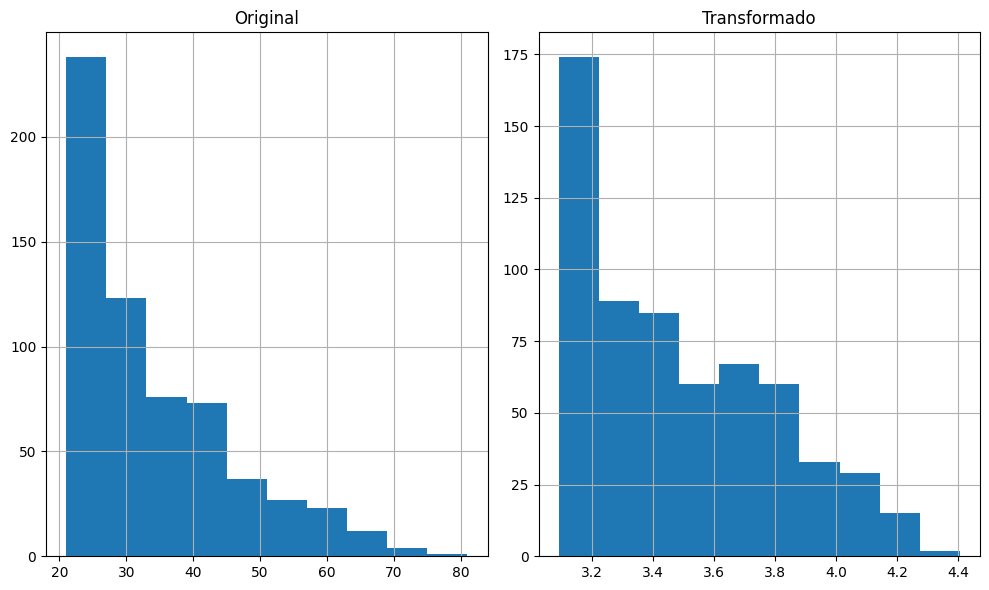

In [139]:
fig, axes = plt.subplots(1,2, figsize=(10,6))
X_train['age'].hist(ax=axes[0])
axes[0].set_title('Original')

np.log1p(X_train['age']).hist(ax=axes[1])
axes[1].set_title('Transformado')
plt.tight_layout();

In [123]:
# Este decido no transformalo, es lo mismo transformado

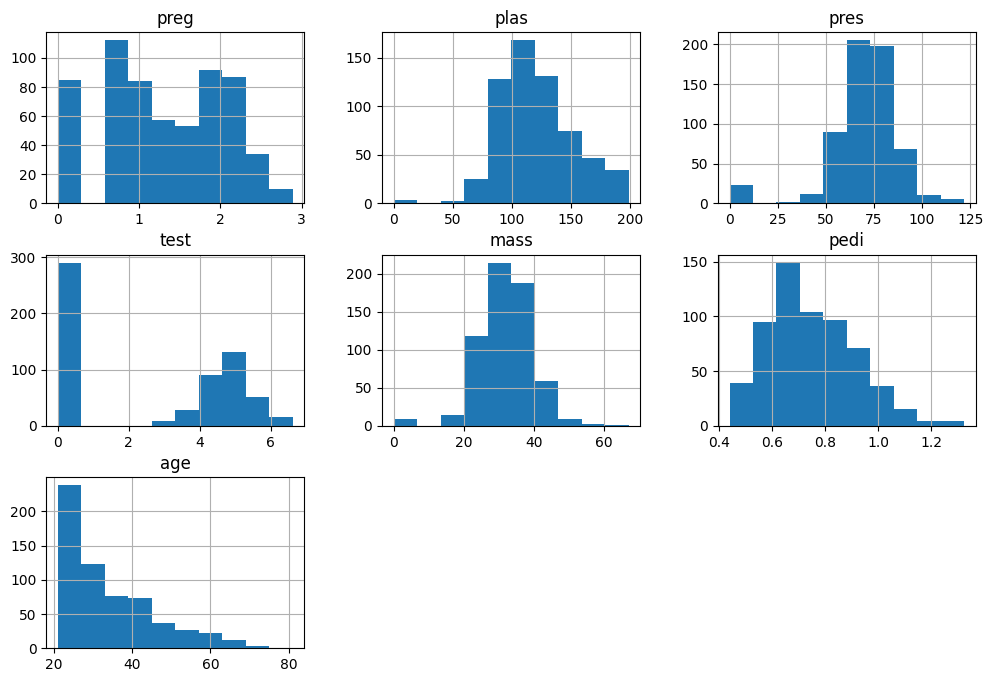

In [140]:
X_train.hist(figsize=(12,8)); 

In [126]:
# así tenemos los datos para train

In [127]:
# vamos a hacer lo mismo para los datos de test

In [141]:
X_test['preg'] = np.log1p(X_test['preg'])
X_test['test'] = np.log1p(X_test['test'])
X_test['pedi'] = np.cbrt(X_test['pedi'])

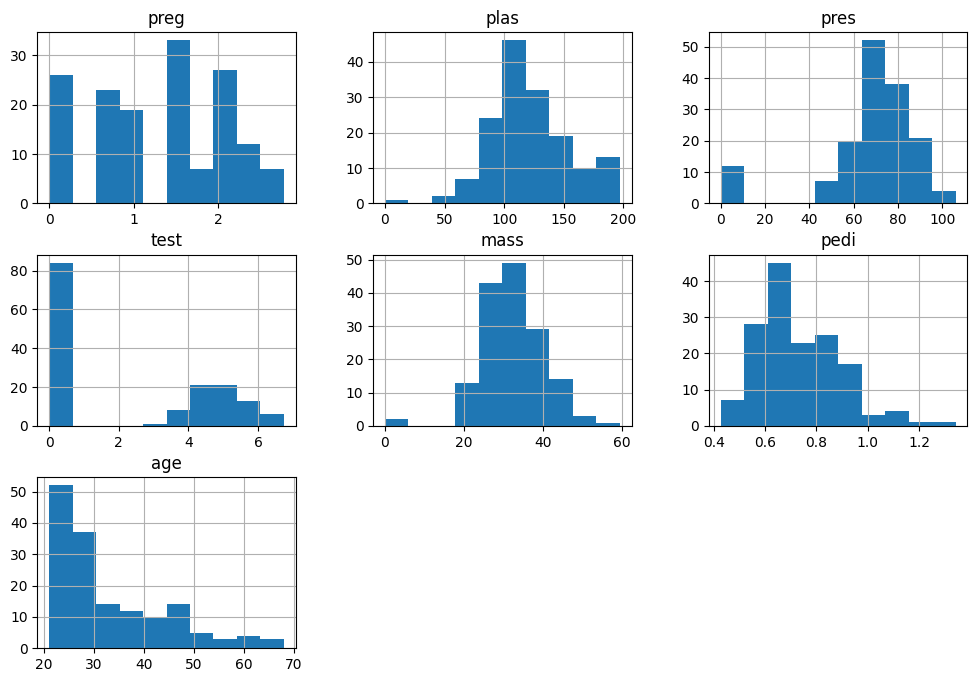

In [142]:
X_test.hist(figsize=(12,8));

In [143]:
# modelos

In [144]:
# Usaré:
# Random Forest = Bagging
# XGBoost = Boosting
# LightGBM = Boosting
# CatBoost = Boosting

In [148]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

nombres = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

r_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42, verbose = -1)
catboost = CatBoostClassifier(random_state=42, verbose = 0)

In [149]:
modelos = [r_forest, xgboost, lightgbm, catboost]

In [152]:
from sklearn.model_selection import cross_val_score

In [ ]:
# probar con otro scoring, ejemplo 'balanced_accuracy'

In [155]:
metricas = {}
valor = []
for nombre, modelo in zip(nombres, modelos):
    metricas[nombre] = cross_val_score(modelo, X_train, y_train, cv= 5, scoring = 'f1')
    valor.append(np.mean(metricas[nombre]))
mejor_modelo = list(metricas.keys())[np.argmax(valor)]

In [158]:
metricas

{'Random Forest': array([0.58823529, 0.69230769, 0.56790123, 0.57142857, 0.6835443 ]),
 'XGBoost': array([0.57142857, 0.71264368, 0.56470588, 0.58227848, 0.60759494]),
 'LightGBM': array([0.53488372, 0.6835443 , 0.57831325, 0.57142857, 0.65060241]),
 'CatBoost': array([0.57831325, 0.73170732, 0.6097561 , 0.61971831, 0.68292683])}

In [162]:
for x, y in metricas.items():
    print(x, '"f1 score medio"', np.mean(y))

Random Forest "f1 score medio" 0.620683419243856
XGBoost "f1 score medio" 0.6077303099327902
LightGBM "f1 score medio" 0.603754451761375
CatBoost "f1 score medio" 0.6444843613547284


In [163]:
# el que tiene mejor valor en el f1 score es el CatBoost
# en este caso usamos f1 porque nos proporciona un balance entre precisión y recall, el recall es muy importante porque
# es mejor que marque a alguien que tiene diabetes y venga al medico a contrastar que no lo contrario y no marque que tiene diabetes,
# es decir así no nos dejamos a nadie con diabetes de verdad

In [159]:
mejor_modelo

'CatBoost'

In [164]:
# vamos a ajustar hiperparametros para 'catBoost'

In [165]:
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid = {
    'depth': [3, 6, 12],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'colsample_bylevel': [0.5,1],
    'iterations': [100, 250, 500, 750],
    'border_count': [125,250]
}
for x in ['f1', 'recall', 'precision']:
    grid = GridSearchCV(catboost,
                       param_grid = param_grid,
                        cv= 5,
                       scoring= x,
                       n_jobs=-1)
    grid.fit(X_train, y_train)
    print("CatBoost best_score:", grid.best_score_)

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Python310\lib\site-packages\catboost\core.py", line 2410, in _fit
    self._train(
  File "C:\Pytho

CatBoost best_score: 0.6546304074586734
CatBoost best_score: 0.6218161683277963


C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
101 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
101 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Python310\lib\site-packages\catboost\core.py", line 2410, in _fit
    self._train(
  File "C:\Pyt

CatBoost best_score: 0.7442569848452202


In [168]:
mejor_modelo = grid.best_estimator_

pred = mejor_modelo.predict(X_test)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
print(confusion_matrix(y_test, pred))

[[85 15]
 [24 30]]


In [171]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [174]:
grid.best_params_

{'border_count': 125,
 'colsample_bylevel': 1,
 'depth': 3,
 'iterations': 100,
 'learning_rate': 0.1}

In [179]:
param_grid2 = {'border_count': [125],
                 'colsample_bylevel': [1],
                 'depth': [3],
                'iterations': [100],
                 'learning_rate': [0.1]}

scoring= {}
for x in ['f1', 'recall', 'precision']:
    grid2 = GridSearchCV(catboost,
                       param_grid = param_grid2,
                        cv= 5,
                       scoring= x,
                       n_jobs=-1)
    grid2.fit(X_train, y_train)
    
    scoring[x] = {
        'grid': grid2,
        'best_score': grid2.best_score_}

In [183]:
scoring

{'f1': {'grid': GridSearchCV(cv=5,
               estimator=<catboost.core.CatBoostClassifier object at 0x000002DFF9EFED70>,
               n_jobs=-1,
               param_grid={'border_count': [125], 'colsample_bylevel': [1],
                           'depth': [3], 'iterations': [100],
                           'learning_rate': [0.1]},
               scoring='f1'),
  'best_score': np.float64(0.649478645600072)},
 'recall': {'grid': GridSearchCV(cv=5,
               estimator=<catboost.core.CatBoostClassifier object at 0x000002DFF9EFED70>,
               n_jobs=-1,
               param_grid={'border_count': [125], 'colsample_bylevel': [1],
                           'depth': [3], 'iterations': [100],
                           'learning_rate': [0.1]},
               scoring='recall'),
  'best_score': np.float64(0.579734219269103)},
 'precision': {'grid': GridSearchCV(cv=5,
               estimator=<catboost.core.CatBoostClassifier object at 0x000002DFF9EFED70>,
               n_jobs=

In [181]:
for x,y in scoring.items():
    print(x,':', y['best_score'])

f1 : 0.649478645600072
recall : 0.579734219269103
precision : 0.7442569848452202


In [184]:
# vamos a elegir recall por su importancia en la salud

In [185]:
param_grid2 = {'border_count': [125],
                 'colsample_bylevel': [1],
                 'depth': [3],
                'iterations': [100],
                 'learning_rate': [0.1]}


grid2 = GridSearchCV(catboost,
                       param_grid = param_grid2,
                        cv= 5,
                       scoring= 'recall',
                       n_jobs=-1)
grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002DFF9EFED70>,
             n_jobs=-1,
             param_grid={'border_count': [125], 'colsample_bylevel': [1],
                         'depth': [3], 'iterations': [100],
                         'learning_rate': [0.1]},
             scoring='recall')

In [186]:
modelo = grid.best_estimator_

y_pred = modelo.predict(X_test)

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [189]:
# Clase 1
#Precision: acierta el 67% de cuando se dice que tiene diabetes
#Recall: solo un 56% de los que si tienen diabetes, 
#F1-score: 61%, se tiene que mejorar porque no queremos que se vaya nadie con diabetes y no este detectado

# Clase 0
#En general tiene valores altos, detecta a los que no tienen diabetes





#conclusión:
#Necesitamos un recall mucho mas alto que solo 56%, para poder tener seguridad sobre los que tienen diabetes